In [1]:
# Dependencies
import numpy as np
import pandas as pd
from collections import Counter
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
columns = ['Country','Happiness score',
            'Explained by: GDP per capita', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                'Explained by: Generosity', 'Explained by: Perceptions of corruption' ]


target = ["Happiness score"]

In [3]:
# Load the dataset.
file_path = "2022.csv"
happy_df = pd.read_csv(file_path, index_col=1)
happy_df.head(10)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,,,,,,
Finland,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
Denmark,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
Iceland,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
Switzerland,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
Netherlands,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
Luxembourg*,6,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
Sweden,7,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
Norway,8,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
Israel,9,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143


In [4]:
happy_df = happy_df.drop(columns=["Whisker-high"], axis=1)
happy_df = happy_df.drop(columns=["Whisker-low"], axis=1)
happy_df = happy_df.drop(columns=["Dystopia (1.83) + residual"], axis=1)
happy_df = happy_df.drop(columns=["Explained by: Social support"], axis=1)
happy_df = happy_df.drop(columns=["RANK"], axis=1)
happy_df.head()

,Happiness score,Explained by: GDP per capita,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,
Finland,7.821,1.892,0.775,0.736,0.109,0.534
Denmark,7.636,1.953,0.777,0.719,0.188,0.532
Iceland,7.557,1.936,0.803,0.718,0.270,0.191
Switzerland,7.512,2.026,0.822,0.677,0.147,0.461
Netherlands,7.415,1.945,0.787,0.651,0.271,0.419


In [5]:
happy_df.loc[happy_df['Happiness score'] < 5, 'Happiness score'] = 0
happy_df.loc[happy_df['Happiness score'] >= 5, 'Happiness score'] = 1
happy_df.head()

,Happiness score,Explained by: GDP per capita,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,
Finland,1.0,1.892,0.775,0.736,0.109,0.534
Denmark,1.0,1.953,0.777,0.719,0.188,0.532
Iceland,1.0,1.936,0.803,0.718,0.270,0.191
Switzerland,1.0,2.026,0.822,0.677,0.147,0.461
Netherlands,1.0,1.945,0.787,0.651,0.271,0.419


In [6]:
# Create our features
X = happy_df.drop('Happiness score', axis=1)
X.columns

y = happy_df['Happiness score']

In [7]:
happy_df.columns

Index(['Happiness score', 'Explained by: GDP per capita',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [8]:
y.value_counts()

1.0    104
0.0     42
Name: Happiness score, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1.0: 78, 0.0: 31})
Counter({1.0: 26, 0.0: 11})


In [11]:
# Combination (Over and Under) Sampling

In [12]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0.0: 56, 1.0: 52})

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=1)

In [15]:
logreg.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [16]:
y_pred_comb = logreg.predict(X_test)
balanced_accuracy_score(y_test, y_pred_comb)

0.8129370629370629

In [17]:
y_predict_train_comb = logreg.predict(X_train)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_train, y_predict_train_comb)

0.8459470636889992

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_comb)

array([[ 9,  2],
       [ 5, 21]])

In [19]:
print(classification_report_imbalanced(y_test, y_pred_comb))


                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.64      0.82      0.81      0.72      0.81      0.66        11
        1.0       0.91      0.81      0.82      0.86      0.81      0.66        26

avg / total       0.83      0.81      0.82      0.82      0.81      0.66        37



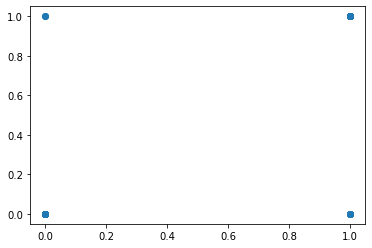

In [20]:
plt.scatter(y_test, y_pred_comb)

In [21]:
logreg.coef_

array([[ 3.67772665,  1.50677968,  2.02480653, -0.01407234,  0.12568457]])

In [22]:
logreg.feature_names_in_

array(['Explained by: GDP per capita',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity',
       'Explained by: Perceptions of corruption'], dtype=object)

In [23]:
X_test["Original"] = y_test

In [24]:
X_test["Predictive"] = y_pred_comb

In [25]:
X_test

,Explained by: GDP per capita,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Original,Predictive
Country,,,,,,,
Congo,0.950,0.355,0.431,0.130,0.146,1.0,0.0
Bosnia and Herzegovina,1.468,0.665,0.448,0.244,0.006,1.0,1.0
Japan,1.835,0.866,0.537,0.007,0.218,1.0,1.0
Ecuador,1.352,0.708,0.565,0.080,0.083,1.0,1.0
Palestinian Territories*,1.148,0.521,0.336,0.073,0.079,0.0,0.0
Montenegro,1.573,0.659,0.460,0.135,0.077,1.0,1.0
Tunisia,1.350,0.656,0.316,0.029,0.029,0.0,0.0
Egypt,1.388,0.548,0.469,0.041,0.254,0.0,0.0
Nicaragua,1.105,0.617,0.617,0.168,0.212,1.0,0.0


In [26]:
X_test.to_csv('X_test_2022.csv', index=True)